# CUSTOMER SEGMENTATION

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data/superstore_dataset2011-2015.csv')
print(data.shape)
data.head()

(51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


## Cleaning

In [3]:
data.loc[data['Country'] == 'Austria', 'Market'] = 'EU'

In [4]:
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    data.loc[:, col] = pd.to_datetime(data[col])

## Clustering with RFM Analysis:
- Recency: How much time has passed since the customer did the last order
- Frequency: The sum of transactions made by the customer
- Monetary value: Two variables: the sum and the mean of the amount expended by the customer in their orders

In [5]:
groupby_cust_object = data.groupby(by='Customer Name')

#### Recency

In [6]:
# let's use 01-01-2015 as "today"
today = pd.to_datetime('01-01-2015')
cust_recency =  today - groupby_cust_object.max()['Order Date'].rename('recency')
cust_recency = cust_recency.dt.days
cust_recency

Customer Name
Aaron Bergman         17
Aaron Hawkins         13
Aaron Smayling        27
Adam Bellavance       26
Adam Hart              3
                      ..
Xylona Preis          44
Yana Sorensen          5
Yoseph Carroll         5
Zuschuss Carroll       4
Zuschuss Donatelli     2
Name: recency, Length: 795, dtype: int64

#### Frequency

In [7]:
cust_frequency = groupby_cust_object.nunique()['Order Date'].rename('frequency')
cust_frequency

Customer Name
Aaron Bergman         37
Aaron Hawkins         34
Aaron Smayling        31
Adam Bellavance       39
Adam Hart             40
                      ..
Xylona Preis          30
Yana Sorensen         31
Yoseph Carroll        30
Zuschuss Carroll      37
Zuschuss Donatelli    29
Name: frequency, Length: 795, dtype: int64

#### Monetary value

In [8]:
cust_monetary_mean = groupby_cust_object.mean()['Sales'].rename('monetary_mean')
cust_monetary_mean

Customer Name
Aaron Bergman         276.905927
Aaron Hawkins         370.705604
Aaron Smayling        236.877140
Adam Bellavance       296.864388
Adam Hart             258.550017
                         ...    
Xylona Preis          199.982797
Yana Sorensen         323.103839
Yoseph Carroll        360.078171
Zuschuss Carroll      335.058732
Zuschuss Donatelli    230.195748
Name: monetary_mean, Length: 795, dtype: float64

In [9]:
cust_monetary_sum = groupby_cust_object.sum()['Sales'].rename('monetary_sum')
cust_monetary_sum

Customer Name
Aaron Bergman         24644.62750
Aaron Hawkins         20759.51384
Aaron Smayling        14212.62840
Adam Bellavance       20186.77840
Adam Hart             21718.20142
                         ...     
Xylona Preis          12198.95060
Yana Sorensen         20032.43800
Yoseph Carroll        20164.37760
Zuschuss Carroll      28479.99226
Zuschuss Donatelli    12430.57040
Name: monetary_sum, Length: 795, dtype: float64

#### Combine the RFM features

In [10]:
RFM_customer_data = pd.concat([cust_recency, cust_frequency, cust_monetary_mean, cust_monetary_sum], axis=1)
RFM_customer_data

,recency,frequency,monetary_mean,monetary_sum
Customer Name,,,,
Aaron Bergman,17,37,276.905927,24644.62750
Aaron Hawkins,13,34,370.705604,20759.51384
Aaron Smayling,27,31,236.877140,14212.62840
Adam Bellavance,26,39,296.864388,20186.77840
Adam Hart,3,40,258.550017,21718.20142
...,...,...,...,...
Xylona Preis,44,30,199.982797,12198.95060
Yana Sorensen,5,31,323.103839,20032.43800
Yoseph Carroll,5,30,360.078171,20164.37760


#### Normalize the data

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(RFM_customer_data)

RFM_customer_data_scaled = pd.DataFrame(scaler.transform(RFM_customer_data), columns=RFM_customer_data.columns, index=RFM_customer_data.index)
RFM_customer_data_scaled.head()

,recency,frequency,monetary_mean,monetary_sum
Customer Name,,,,
Aaron Bergman,-0.309491,1.021462,0.496900,1.679065
Aaron Hawkins,-0.440576,0.447431,2.016268,0.932865
Aaron Smayling,0.018220,-0.126600,-0.151487,-0.324571
Adam Bellavance,-0.014551,1.404149,0.820187,0.822862
Adam Hart,-0.768287,1.595492,0.199571,1.116997


#### Determine the number of clusters

Text(0.5, 1.0, 'MSE for every K tried')

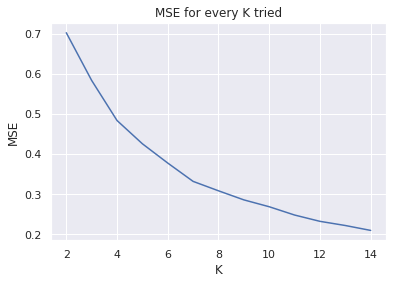

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

mses_per_k = []
K_to_try = np.arange(2, 15)

for k in K_to_try:
    means = KMeans(k)
    predictions = means.fit_predict(RFM_customer_data_scaled)
    mses = []
    for i in range(len(predictions)):
        cluster_center = means.cluster_centers_[predictions[i]]
        point = RFM_customer_data_scaled.iloc[i]
        mses.append(mean_squared_error(cluster_center, point))
    
    mses_per_k.append(np.mean(mses))

plt.plot(K_to_try, mses_per_k)
plt.ylabel('MSE')
plt.xlabel('K')
plt.title('MSE for every K tried')

#### Predict the clusters

In [13]:
k = 6
k_means = KMeans(k, random_state=42)
k_means.fit(RFM_customer_data_scaled)
predictions = k_means.predict(RFM_customer_data_scaled)

In [14]:
RFM_customer_data_scaled['cluster'] = predictions
RFM_customer_data['cluster'] = RFM_customer_data_scaled['cluster']
RFM_customer_data

,recency,frequency,monetary_mean,monetary_sum,cluster
Customer Name,,,,,
Aaron Bergman,17,37,276.905927,24644.62750,2
Aaron Hawkins,13,34,370.705604,20759.51384,2
Aaron Smayling,27,31,236.877140,14212.62840,3
Adam Bellavance,26,39,296.864388,20186.77840,2
Adam Hart,3,40,258.550017,21718.20142,1
...,...,...,...,...,...
Xylona Preis,44,30,199.982797,12198.95060,4
Yana Sorensen,5,31,323.103839,20032.43800,2
Yoseph Carroll,5,30,360.078171,20164.37760,2


#### Number of customer per cluster

<AxesSubplot:xlabel='count', ylabel='cluster'>

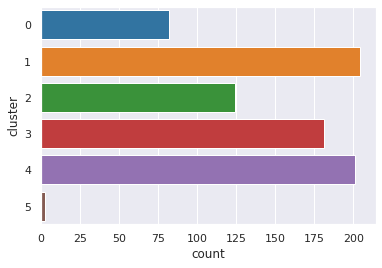

In [15]:
sns.countplot(y='cluster', data=RFM_customer_data, palette='tab10')

#### Distribution of features by cluster

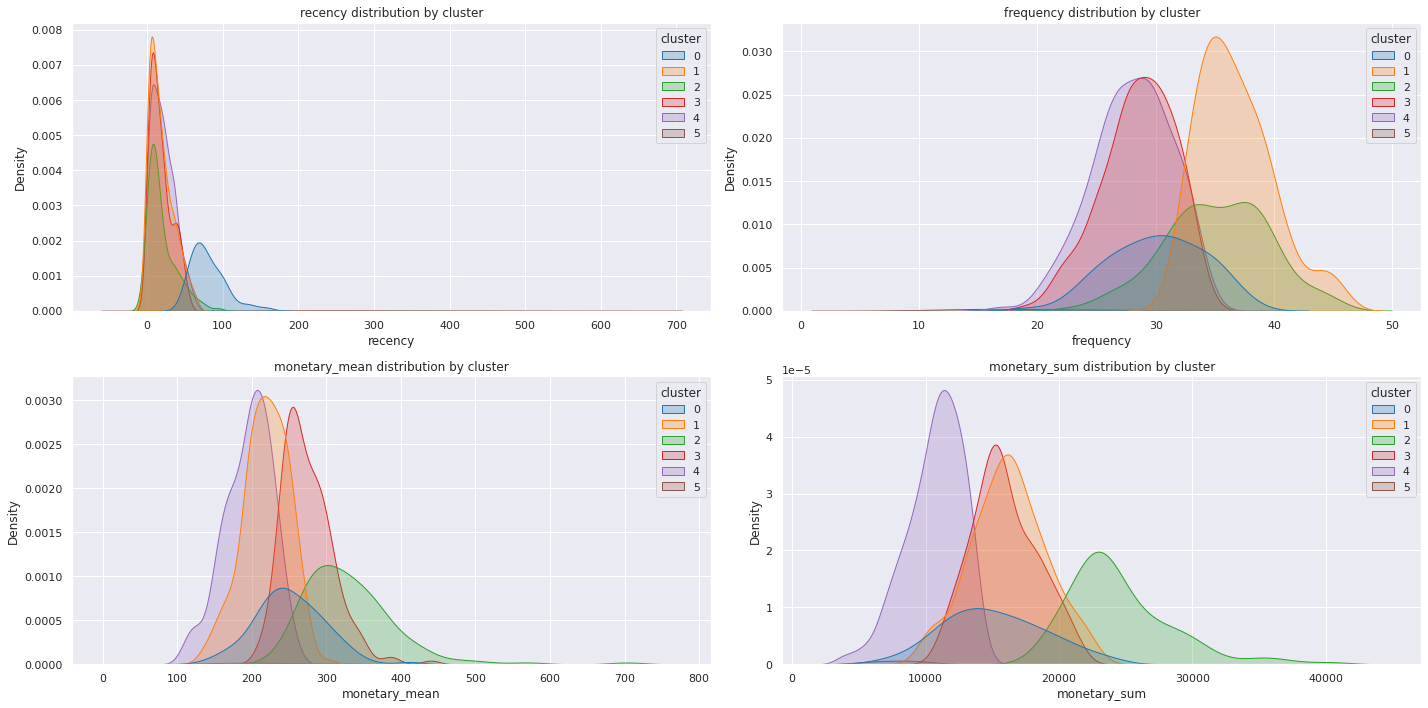

In [16]:
variables = RFM_customer_data.columns.drop('cluster')

n_rows = 2
n_cols = 2

fig = plt.figure(figsize=(20, 10))

for i, variable in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.kdeplot(x=variable, hue='cluster', data=RFM_customer_data, palette='tab10', fill=True)
    plt.title(f'{variable} distribution by cluster')

plt.tight_layout()

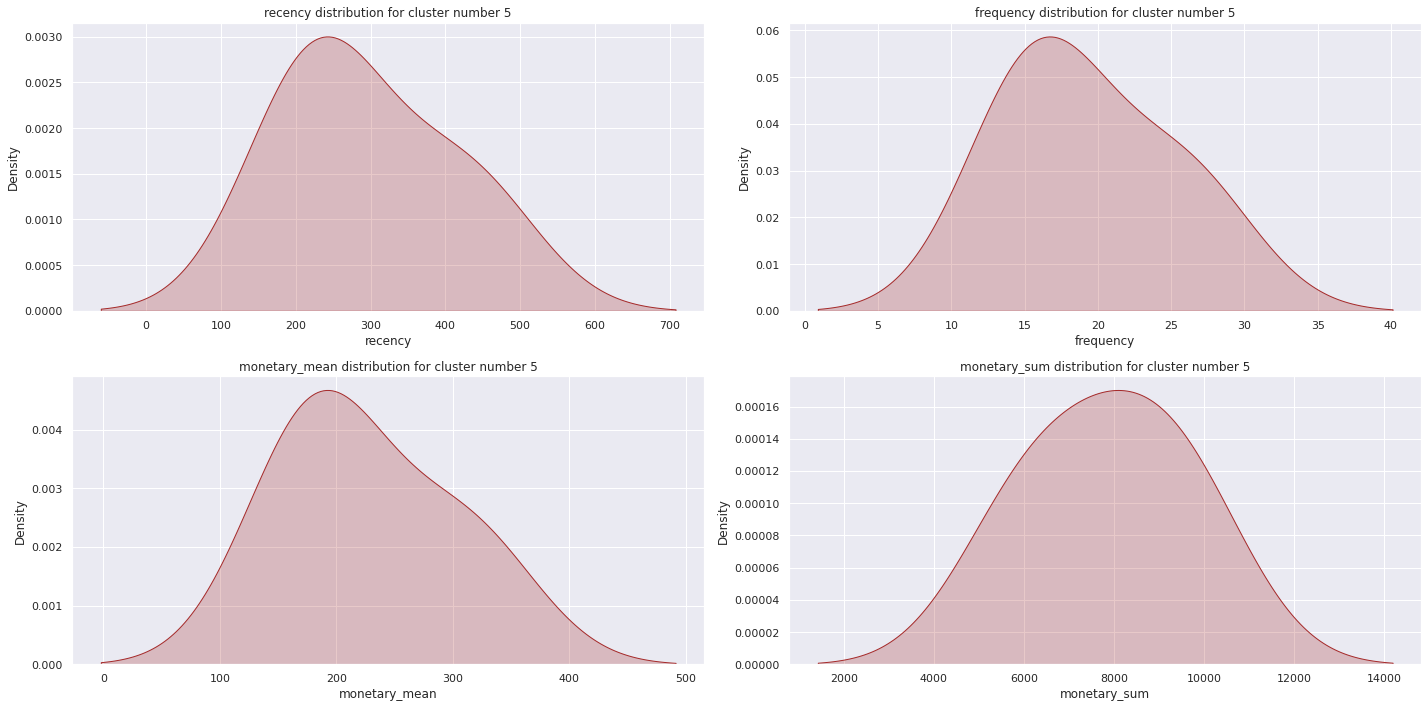

In [23]:
fig = plt.figure(figsize=(20, 10))

for i, variable in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.kdeplot(x=variable, data=RFM_customer_data[RFM_customer_data['cluster'] == 5], color='brown', fill=True)
    plt.title(f'{variable} distribution for cluster number 5')

plt.tight_layout()

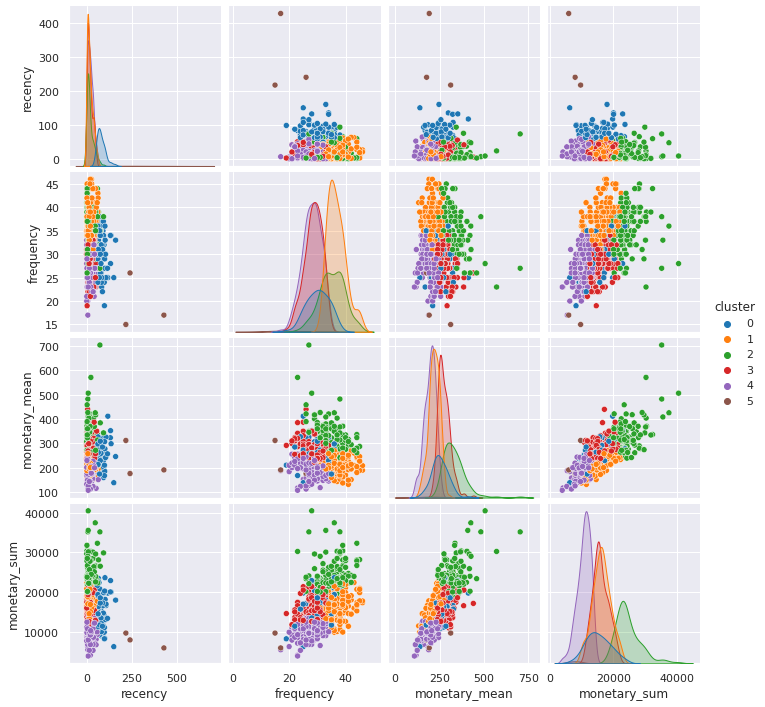

In [18]:
sns.pairplot(RFM_customer_data, hue='cluster', palette='tab10')

### Making sense of the resulting clusters

In [19]:
RFM_customer_data.groupby('cluster').median()

,recency,frequency,monetary_mean,monetary_sum
cluster,,,,
0,76,30,246.031360,14556.43898
1,15,36,219.597388,16176.55214
2,12,35,320.537443,23625.53985
3,14,29,268.935266,15543.40910
4,17,28,199.982797,10981.62050
5,241,17,191.454045,7954.11330


In [20]:
for var in variables:
    cluster_order = RFM_customer_data.groupby("cluster").median().sort_values(var, ascending=False)[var].index.to_list()
    print(f'Order in {var}, descending: {cluster_order}')
print(f'Order in population, descending: {RFM_customer_data["cluster"].value_counts(ascending=False).index.to_list()}')

Order in recency, descending: [5, 0, 4, 1, 3, 2]
Order in frequency, descending: [1, 2, 0, 3, 4, 5]
Order in monetary_mean, descending: [2, 3, 0, 1, 4, 5]
Order in monetary_sum, descending: [2, 1, 3, 0, 4, 5]
Order in population, descending: [1, 4, 3, 2, 0, 5]


The cluster with the best clients is the one that spends more (median and total)

There are 5 groups, ordered by the money they spent so far:
- Best customers (frequent, high-spending): the ones with the highest total expenditure and average expenditure. These are frequent customers that make big orders.
- Good, frequent customers: this customers are as loyal as the best customers, but their orders are a bit smaller.
- Loyal, average customers: these clients spent more or less the same as the previous category, but less frequently
- Churned average customers: customers that haven't put an order in some time, more time than the frequency they usually show
- Loyal, low-spending customers: these are low-spending clients with lower frequency between orders
- Occcasional, low-spending customers: clients that buy occasionally

In [40]:
keys_clusters_by_expenditure = RFM_customer_data.groupby("cluster").median().sort_values(var, ascending=False)['monetary_sum'].index.to_list()
list_names_clusters = ['Best customers', 'Good, frequent customers', 'Loyal, average customers', 'Churned average customers', 'Loyal, low-spending customers', 'Occasional, low-spending customers']

map_names_clusters = {k:v for k, v in zip(keys_clusters_by_expenditure, list_names_clusters)}
map_names_clusters

{2: 'Best customers',
 1: 'Good, frequent customers',
 3: 'Loyal, average customers',
 0: 'Churned average customers',
 4: 'Loyal, low-spending customers',
 5: 'Occasional, low-spending customers'}

#### Clusters by population

In [41]:
list_names_clusters_ordered = [map_names_clusters[k] for k in sorted(map_names_clusters)]

Text(0.5, 1.0, 'Customer clusters')

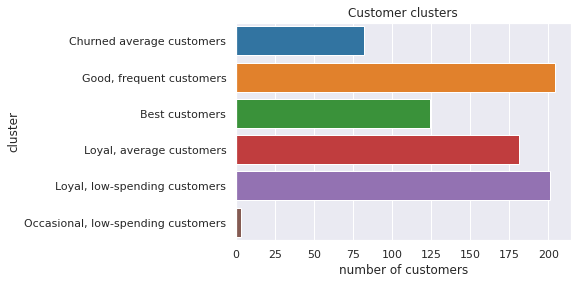

In [42]:
fig, ax = plt.subplots()
sns.countplot(y='cluster', data=RFM_customer_data, palette='tab10')
ax.set_yticklabels(list_names_clusters_ordered)
ax.set_xlabel('number of customers')
plt.title('Customer clusters')

#### Types of consumption by cluster

In [45]:
cust_clusters = RFM_customer_data[['cluster']].reset_index()
data_with_clusters = pd.merge(data, cust_clusters, on='Customer Name')

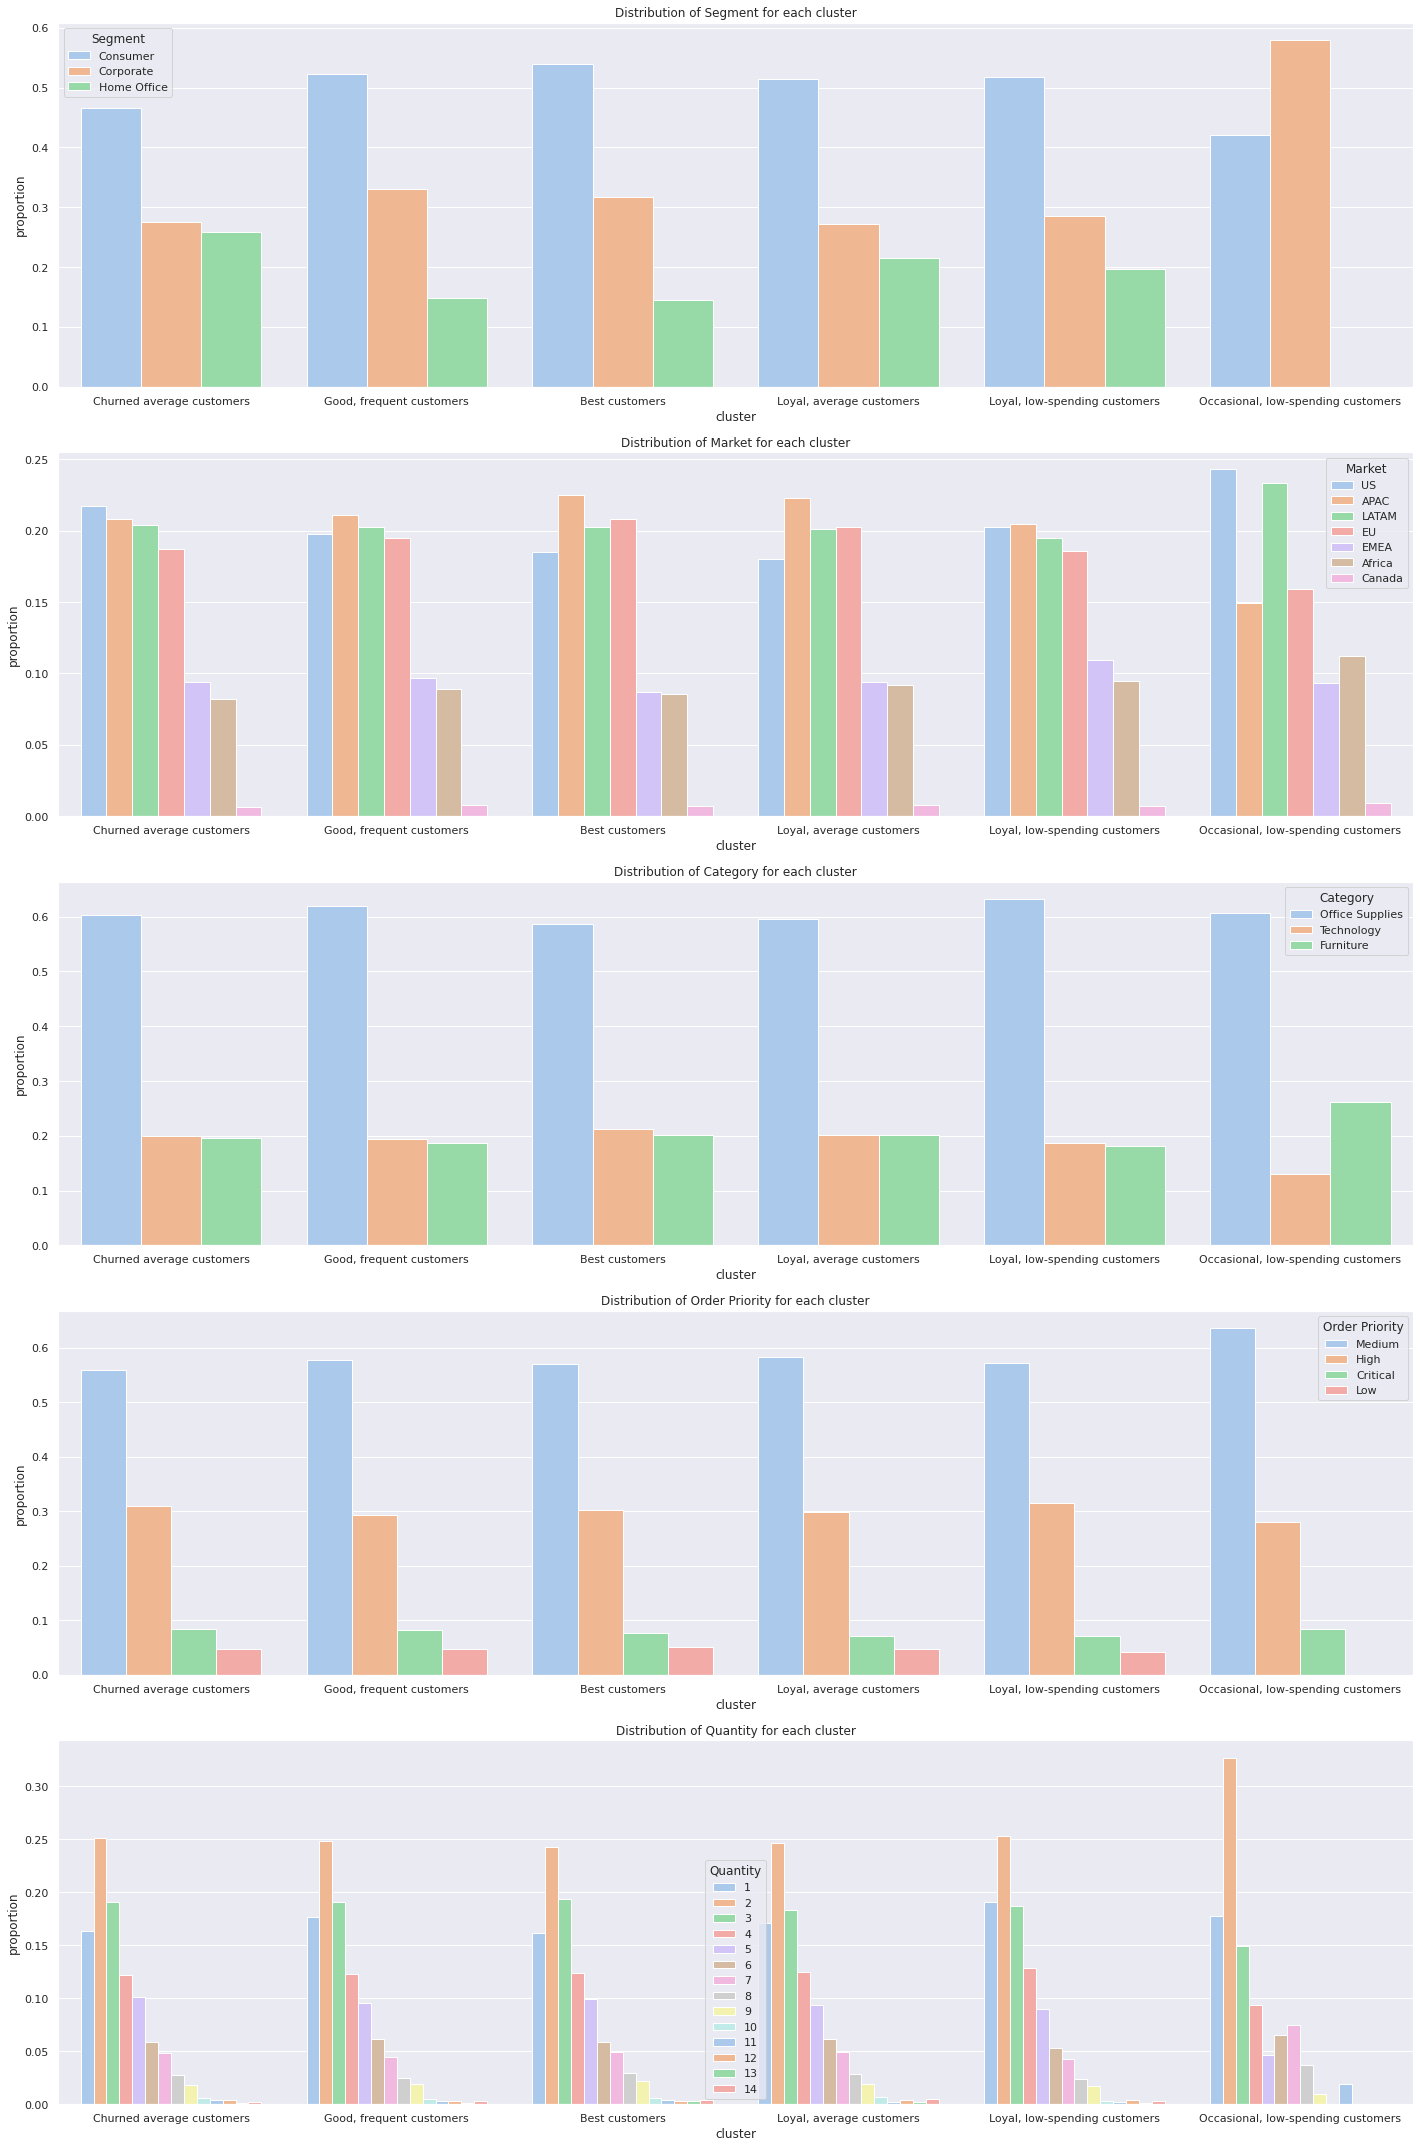

In [145]:
list_of_vars_to_compare = ['Segment', 'Market', 'Category', 'Order Priority', 'Quantity']

fig = plt.figure(figsize=(20, 30))

n_rows = 5
n_cols = 1

for i,var in enumerate(list_of_vars_to_compare):
    var_proportions = (data_with_clusters
                         .groupby('cluster')[var]
                         .value_counts(normalize=True)
                         .rename('proportion')
                         .reset_index())
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.barplot(x='cluster', y='proportion', hue=var, data=var_proportions, palette='pastel')
    plt.title(f'Distribution of {var} for each cluster')
    ax.set_xticklabels(labels=list_names_clusters_ordered)
    
plt.tight_layout()

#### Summary:
- Canada is not a very big Market in any of the clusters (maybe because the other markets are bigger in size)
- The most buyed category in every cluster is Office Supplies
- The most used order priority is Medium
- Most of the purchases are made in pairs (more than individual purchases!). 3, 4, 5... and so on are decreasingly less frequent

##### **Peculiarities**:

Churned average customers:
- have a higher proportion of home office consumers than the rest of the clusters

Loyal, average customers:
- also have a higher proportion of home office consumers, compared to the other clusters

Loyal, low-spending customers:
- they buy more from EMEA and Africa markets than the other clusters

Occasional, low-spending customers:
- they buy more furniture than the rest
- they belong mostly to corporate segment
- they buy more from US and LATAM market than the other clusters
- never use low priority orders
- they purchase big quantities more than the other clusters